<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/08_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8.3 NetCDF
In this section, we will read a NetCDF file, and write in the same format. I am using the file, rhum.2003.nc which can be downloaded from http://www.unidata.ucar.edu/software/netcdf/examples/files.html. We will be using NetCDF library from Scientific.IO to read and write the NetCDF data, so lets first import it.


In [1]:
from google.colab import drive
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

drive.mount("/content/gdrive/")

file = '/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/rhum.2003.nc'

Mounted at /content/gdrive/


### 8.3.1 Reading
Let us start by reading a file. First, we open the file.

In [14]:
ds = nc.Dataset(file)
print(ds)

# print the dimensions of the nc file
print(ds.dimensions)

print(ds.title)
print(ds.description)

# we can print the dimensions one by one
for d in ds.dimensions.values():
    print(d)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: COARDS
    title: mean daily NMC reanalysis (2003)
    base_date: [2003    1    1]
    history: created 03/08/18 by Hoop (netCDF2.3)
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of most variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    dimensions(sizes): lon(144), lat(73), level(8), time(365)
    variables(dimensions): float32 level(level), float32 lat(lat), float32 lon(lon), float64 time(time), int16 rhum(time, level, lat, lon)
    groups: 
{'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73, 'level': <class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 8, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 365}
mean daily NMC reanalysis (2003)
Data is from NMC initiali

In *nc* file, one dimension can be unlimited, which is time in this file. This file has four dimensions. *nc* file can have any number of dimensions, and we can read any chunk of data without reading the entire file. If the file size is large, it becomes very useful and we can work on the file even if our system can not load the entire file in one go. Let us look at the variables in the *nc* file.

In [15]:
print(ds.variables)
print("======= Variable names on seperate line =====")
# print one by one
for var in ds.variables:
  print(var)

{'level': <class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    units: millibar
    actual_range: [1000.  300.]
    long_name: Level
    positive: down
    GRIB_id: 100
    GRIB_name: hPa
unlimited dimensions: 
current shape = (8,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    actual_range: [ 90. -90.]
    long_name: Latitude
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.  357.5]
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: hours since 1-1-1 00:00:0.0
    long_name: Time
    actual_range: [17549208. 17557944.]
    delta_t: 0000-00-01 00:00:00
    avg_p

We have five variables including the dimensions. We can access the value of any dimension or variables as:

In [16]:
ds['level'][5]

masked_array(data=500.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [17]:
ds['rhum'].shape

(365, 8, 73, 144)

(array([31., 13., 39., 28., 47., 50., 48., 32., 36., 41.]),
 array([-30266., -29266., -28266., -27266., -26266., -25266., -24266.,
        -23266., -22266., -21266., -20266.], dtype=float32),
 <a list of 10 Patch objects>)

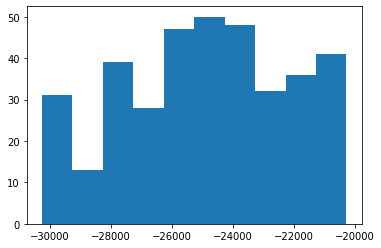

In [19]:
plt.hist(ds['rhum'][:,1,1,1])

From the output of *ds.variables*, we know the *rhum* variable has dimension of (time, level, lat, lon). We can access the data from this variable like a *numpy.array*.

### 8.3.2 Writing
We can write the file in the same way. First we open the file for writing.

In [6]:
out_file = '/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/test.nc'
ds = nc.Dataset(out_file, 'w', format='NETCDF4')


Then we can define some global attributes like title, description etc.

In [7]:
setattr(ds, 'title', 'trial')
setattr(ds, 'description', 'File generated while tesing to write in NetCDF')

Now, we can create some dimensions. We need to define the name of dimension and their size.

In [8]:
ds.createDimension('lat', 73) 
ds.createDimension('lon', 144) 
ds.createDimension('level', 8) 
ds.createDimension('time', 365)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 365

Now, we can save the variables. First, we need to define the dimension from the list created above. The dimension should be tuple, notice the comma after the 'lat', . After this, we can create variable using createVariable, we need to specify the name of variable, format and dimension. We see that it has created a variable named ’lat’ and is referring to it.

In [9]:
varDims = 'lat',
lat = ds.createVariable('lat', 'f', varDims)
print(ds.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used}


Finally, we can assign our data to this variable.

In [10]:
lat[:] = np.random.rand(73)

Now, we can close the file.

In [11]:
ds.close()